In [1]:
# read nc output from WAOM 10km run

import xarray as xr
import pandas as p
import numpy as np
import numpy.ma as ma
import cartopy.crs as ccrs
import matplotlib as mpl
# mpl.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.ticker import NullFormatter
from matplotlib.colors import LinearSegmentedColormap   # for custom colormaps

from datetime import datetime, timedelta

from netCDF4 import Dataset
from netCDF4 import num2date, date2num
from matplotlib.ticker import NullFormatter
from matplotlib.colors import LinearSegmentedColormap   # for custom colormaps

import gsw

import pyresample


In [2]:
dg10 = xr.open_dataset("/scratch/project_2000789/boeiradi/waom10_frc/waom10extend_grd.nc")
lat_rho_10 = dg10.variables["lat_rho"]
lon_rho_10 = dg10.variables["lon_rho"]
dg10.close()

dg4 = xr.open_dataset("/scratch/project_2000789/boeiradi/waom4_frc/waom4extend_grd.nc")
lat_rho_4 = dg4.variables["lat_rho"]
lon_rho_4 = dg4.variables["lon_rho"]
dg4.close()

dg2 = xr.open_dataset("/scratch/project_2000339/boeiradi/waom2_frc/waom2extend_grd.nc")
lat_rho_2 = dg2.variables["lat_rho"]
lon_rho_2 = dg2.variables["lon_rho"]
dg2.close()



In [3]:
rho_grid=np.arange(26.,28.,0.05) # for sigma-0
len_rho_grid=len(rho_grid)

# figures
fig_path = '/users/boeiradi/COLD_project/postprocessing/figs/WMT/'

# plot with bars
width=.023

# convert to rate per year:
Dt = 1000/0.05

print(rho_grid[19],rho_grid[39])


26.950000000000014 27.950000000000028


In [4]:
# read WAOM10 WMT maps
d10 = xr.open_dataset('/scratch/project_2000339/boeiradi/waom10extend_shflim_S_0.25Q/output_20yr_diag/Full_vint_WMTmaps.nc')
salt_net_10 = d10.variables['map_salt_net']
salt_adv_10 = d10.variables['map_salt_adv']
salt_diff_10 = d10.variables['map_salt_diff']
salt_hdiff_10 = d10.variables['map_salt_hdiff']
salt_vdiff_10 = d10.variables['map_salt_vdiff']
salt_sfc_10 = d10.variables['map_salt_sfc']
d10.close()


In [5]:
# read WAOM10 WMT maps
d4 = xr.open_dataset('/scratch/project_2000789/boeiradi/waom4extend_shflim_S_0.25Q/output_yr10_diag/Full_vint_WMTmaps.nc')
salt_net_4 = d4.variables['map_salt_net']
salt_adv_4 = d4.variables['map_salt_adv']
salt_diff_4 = d4.variables['map_salt_diff']
salt_hdiff_4 = d4.variables['map_salt_hdiff']
salt_vdiff_4 = d4.variables['map_salt_vdiff']
salt_sfc_4 = d4.variables['map_salt_sfc']
d4.close()

In [6]:
# read WAOM10 WMT maps
d4 = xr.open_dataset('/scratch/project_2000789/boeiradi/waom4extend_shflim_S_0.25Q/output_yr10_notides_diag/Full_vint_WMTmaps.nc')
salt_net_4nt = d4.variables['map_salt_net']
salt_adv_4nt = d4.variables['map_salt_adv']
salt_diff_4nt = d4.variables['map_salt_diff']
salt_hdiff_4nt = d4.variables['map_salt_hdiff']
salt_vdiff_4nt = d4.variables['map_salt_vdiff']
salt_sfc_4nt = d4.variables['map_salt_sfc']
d4.close()

In [7]:
# read WAOM10 WMT maps
d4 = xr.open_dataset('/scratch/project_2000789/boeiradi/waom4extend_shflim_S_0.25Q/output_yr10_10km-bathy_diag/Full_vint_WMTmaps.nc')
salt_net_4c = d4.variables['map_salt_net']
salt_adv_4c = d4.variables['map_salt_adv']
salt_diff_4c = d4.variables['map_salt_diff']
salt_hdiff_4c = d4.variables['map_salt_hdiff']
salt_vdiff_4c = d4.variables['map_salt_vdiff']
salt_sfc_4c = d4.variables['map_salt_sfc']
d4.close()

In [8]:
# read WAOM2 WMT maps
d2 = xr.open_dataset('/scratch/project_2000339/boeiradi/waom2extend_shflim_S_0.25Q/output_yr5/Full_vint_WMTmaps.nc')
salt_net_2 = d2.variables['map_salt_net']
salt_adv_2 = d2.variables['map_salt_adv']
salt_diff_2 = d2.variables['map_salt_diff']
salt_hdiff_2 = d2.variables['map_salt_hdiff']
salt_vdiff_2 = d2.variables['map_salt_vdiff']
salt_sfc_2 = d2.variables['map_salt_sfc']
d2.close()

In [9]:
# read bottom temperature and currents from annual, 10km-interpolated netcdf file:
# --- created with /users/boeiradi/COLD_project/postprocessing/waom_notebook/Maps_validations/WAOM10x4x2extend_shflim_S_0.25Q_TSVel_sfcXsfc.py

dt = xr.open_dataset('/scratch/project_2000339/boeiradi/waom10extend_shflim_S_0.25Q/output_20yr_diag/WAOM10x4x2_Annual_bottom_temp_UV_maps.nc')
temp_ann_sfc_10 = np.squeeze(dt.variables['temp_ann_sfc_10'])
temp_ann_sfc_4 = np.squeeze(dt.variables['temp_ann_sfc_4'])
temp_ann_sfc_4nt = np.squeeze(dt.variables['temp_ann_sfc_4nt'])
temp_ann_sfc_4c = np.squeeze(dt.variables['temp_ann_sfc_4c'])
temp_ann_sfc_2 = np.squeeze(dt.variables['temp_anns_fc_2'])

salt_ann_sfc_10 = np.squeeze(dt.variables['salt_ann_sfc_10'])
salt_ann_sfc_4 = np.squeeze(dt.variables['salt_ann_sfc_4'])
salt_ann_sfc_4nt = np.squeeze(dt.variables['salt_ann_sfc_4nt'])
salt_ann_sfc_4c = np.squeeze(dt.variables['salt_ann_sfc_4c'])
salt_ann_sfc_2 = np.squeeze(dt.variables['salt_ann_sfc_2'])

u_10_sfc = np.squeeze(dt.variables['u_10_sfc'])
v_10_sfc = np.squeeze(dt.variables['v_10_sfc'])
u_4_sfc = np.squeeze(dt.variables['u_4_sfc'])
v_4_sfc = np.squeeze(dt.variables['v_4_sfc'])
u_4nt_sfc = np.squeeze(dt.variables['u_4nt_sfc'])
v_4nt_sfc = np.squeeze(dt.variables['v_4nt_sfc'])
u_4c_sfc = np.squeeze(dt.variables['u_4c_sfc'])
v_4c_sfc = np.squeeze(dt.variables['v_4c_sfc'])
u_2_sfc = np.squeeze(dt.variables['u_2_sfc'])
v_2_sfc = np.squeeze(dt.variables['v_2_sfc'])

xs_10 = np.squeeze(dt.variables['xs_10'])
ys_10 = np.squeeze(dt.variables['ys_10'])
xs_4 = np.squeeze(dt.variables['xs_4'])
ys_4 = np.squeeze(dt.variables['ys_4'])
xs_2 = np.squeeze(dt.variables['xs_2'])
ys_2 = np.squeeze(dt.variables['ys_2'])

dt.close()






                  


In [10]:
### plot maps
import matplotlib.path as mpath
import cartopy.feature as cfeature

def lonlat_labels(ax):
    # latitude labels
    ax.text(120,-80,'80$^{\circ}$S',transform=ccrs.PlateCarree(),color='gray')
    ax.text(120,-70,'70$^{\circ}$S',transform=ccrs.PlateCarree(),color='gray')
    # longitude labels
    ax.text(0,-66,'0$^{\circ}$',transform=ccrs.PlateCarree(),color='gray')
    #ax.text(60,-53,'60$^{\circ}$E',transform=ccrs.PlateCarree(),color='gray')
    #ax.text(120,-53,'120$^{\circ}$E',transform=ccrs.PlateCarree(),color='gray')
    ax.text(-60,-48,'60$^{\circ}$W',transform=ccrs.PlateCarree(),color='gray')
    ax.text(-120,-48,'120$^{\circ}$W',transform=ccrs.PlateCarree(),color='gray')
    ax.text(180,-60,'180$^{\circ}$',transform=ccrs.PlateCarree(),color='gray')
    return

proj = ccrs.SouthPolarStereo()

di = xr.open_dataset('/scratch/project_2000339/boeiradi/waom2extend_shflim_S_0.25Q/output_yr5/ocean_avg_0001.nc')
ice_draft = di.variables["zice"]
h = di.variables["h"]


In [11]:
from xgcm import Grid

# Bottom velocity magnitude
V10_sfc = np.sqrt(u_10_sfc*u_10_sfc + v_10_sfc*v_10_sfc)
V4_sfc = np.sqrt(u_4_sfc*u_4_sfc + v_4_sfc*v_4_sfc)
V2_sfc = np.sqrt(u_2_sfc*u_2_sfc + v_2_sfc*v_2_sfc)
V4c_sfc = np.sqrt(u_4c_sfc*u_4c_sfc + v_4c_sfc*v_4c_sfc)
# re-grid 4km currents to 10km grid:
w10_def = pyresample.geometry.SwathDefinition(lons=lon_rho_10,lats=lat_rho_10)
w4_def = pyresample.geometry.SwathDefinition(lons=lon_rho_4,lats=lat_rho_4)
w2_def = pyresample.geometry.SwathDefinition(lons=lon_rho_2,lats=lat_rho_2)

wf = lambda r: 1/r

V4_sfc_interp = pyresample.kd_tree.resample_custom(w4_def,V4_sfc.values,w10_def,\
                                         radius_of_influence=30000,neighbours=4,weight_funcs=wf)
V2_sfc_interp = pyresample.kd_tree.resample_custom(w2_def,V2_sfc.values,w10_def,\
                                         radius_of_influence=5000,neighbours=1,weight_funcs=wf)
V4c_sfc_interp = pyresample.kd_tree.resample_custom(w4_def,V4c_sfc.values,w10_def,\
                                         radius_of_influence=30000,neighbours=4,weight_funcs=wf)


/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/pyresample/kd_tree.py:384: UserWarning: Possible more than 4 neighbours within 30000 m for some data points
  warnings.warn(('Possible more than %s neighbours '


In [16]:
salt_vdiff_4.shape

(21, 1, 1400, 1575)

/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/pyresample/kd_tree.py:384: UserWarning: Possible more than 10 neighbours within 300000 m for some data points
  warnings.warn(('Possible more than %s neighbours '
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = matplotlib.ax

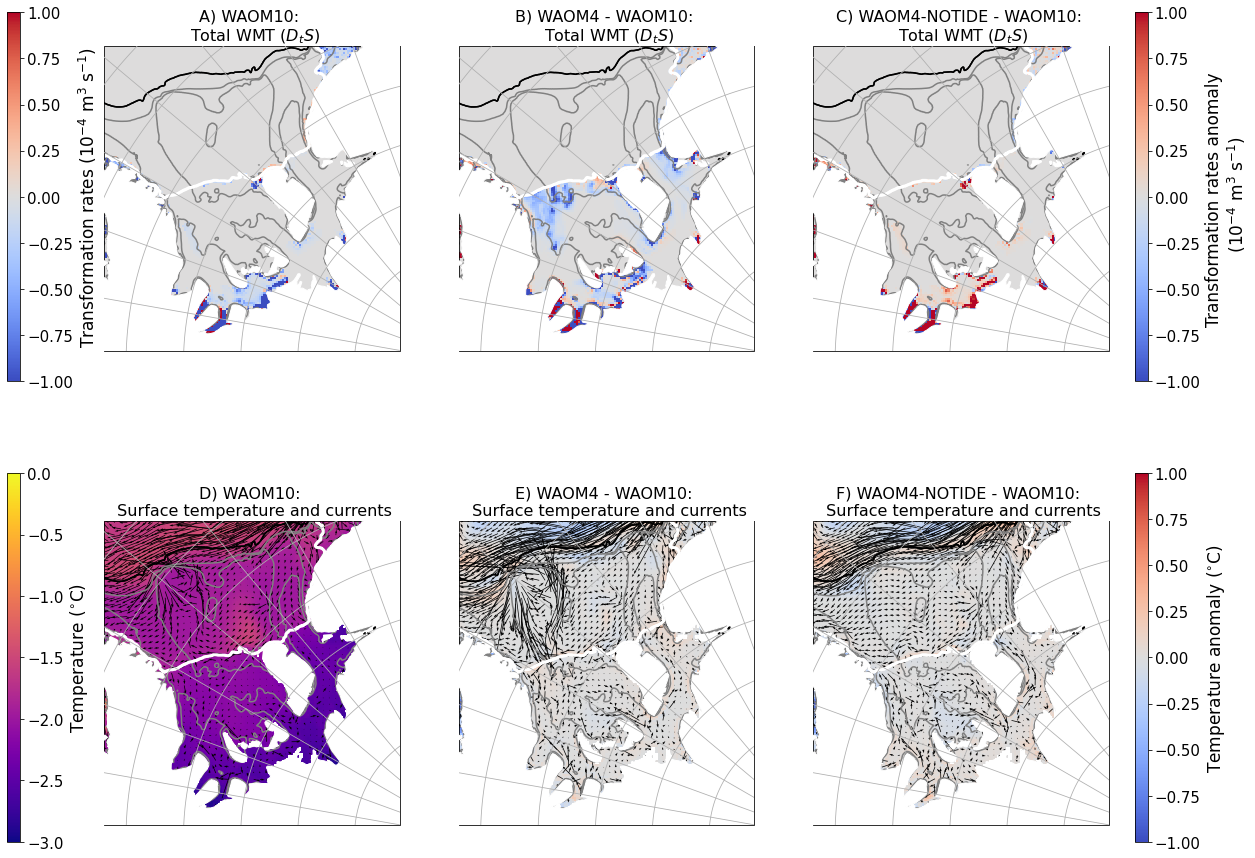

In [17]:
### Figures for the paper:

# 1) FRIS: only show WAOM10 x WAOM4 x WAOM4-NOTIDE: upper row
# Surface temperature and annual currents: lower row

## plots FRIS

# integrated from 27.3:27.5 kg m-3:

# indexes [imin:imax]
imin=7
imax=11

salt_net_Wed_10 = np.nansum(np.squeeze(salt_net_10[imin:imax]), axis=0)
salt_net_Wed_4 = np.nansum(np.squeeze(salt_net_4[imin:imax]), axis=0)
salt_net_Wed_2 = np.nansum(np.squeeze(salt_net_2[imin:imax]), axis=0)
salt_net_Wed_4nt = np.nansum(np.squeeze(salt_net_4nt[imin:imax]), axis=0)
salt_net_Wed_4c = np.nansum(np.squeeze(salt_net_4c[imin:imax]), axis=0)

salt_adv_Wed_10 = np.nansum(np.squeeze(salt_adv_10[imin:imax]), axis=0)
salt_adv_Wed_4 = np.nansum(np.squeeze(salt_adv_4[imin:imax]), axis=0)
salt_adv_Wed_2 = np.nansum(np.squeeze(salt_adv_2[imin:imax]), axis=0)
salt_adv_Wed_4nt = np.nansum(np.squeeze(salt_adv_4nt[imin:imax]), axis=0)
salt_adv_Wed_4c = np.nansum(np.squeeze(salt_adv_4c[imin:imax]), axis=0)

salt_diff_Wed_10 = np.nansum(np.squeeze(salt_diff_10[imin:imax]), axis=0)
salt_diff_Wed_4 = np.nansum(np.squeeze(salt_diff_4[imin:imax]), axis=0)
salt_diff_Wed_2 = np.nansum(np.squeeze(salt_diff_2[imin:imax]), axis=0)
salt_diff_Wed_4nt = np.nansum(np.squeeze(salt_diff_4nt[imin:imax]), axis=0)
salt_diff_Wed_4c = np.nansum(np.squeeze(salt_diff_4c[imin:imax]), axis=0)

salt_vdiff_Wed_10 = np.nansum(np.squeeze(salt_vdiff_10[imin:imax]), axis=0)
salt_vdiff_Wed_4 = np.nansum(np.squeeze(salt_vdiff_4[imin:imax]), axis=0)
salt_vdiff_Wed_2 = np.nansum(np.squeeze(salt_vdiff_2[imin:imax]), axis=0)
salt_vdiff_Wed_4nt = np.nansum(np.squeeze(salt_vdiff_4nt[imin:imax]), axis=0)
salt_vdiff_Wed_4c = np.nansum(np.squeeze(salt_vdiff_4c[imin:imax]), axis=0)

salt_hdiff_Wed_10 = np.nansum(np.squeeze(salt_hdiff_10[imin:imax]), axis=0)
salt_hdiff_Wed_4 = np.nansum(np.squeeze(salt_hdiff_4[imin:imax]), axis=0)
salt_hdiff_Wed_2 = np.nansum(np.squeeze(salt_hdiff_2[imin:imax]), axis=0)
salt_hdiff_Wed_4nt = np.nansum(np.squeeze(salt_hdiff_4nt[imin:imax]), axis=0)
salt_hdiff_Wed_4c = np.nansum(np.squeeze(salt_hdiff_4c[imin:imax]), axis=0)

salt_sfc_Wed_10 = np.nansum(np.squeeze(salt_sfc_10[imin:imax]), axis=0)
salt_sfc_Wed_4 = np.nansum(np.squeeze(salt_sfc_4[imin:imax]), axis=0)
salt_sfc_Wed_2 = np.nansum(np.squeeze(salt_sfc_2[imin:imax]), axis=0)
salt_sfc_Wed_4nt = np.nansum(np.squeeze(salt_sfc_4nt[imin:imax]), axis=0)
salt_sfc_Wed_4c = np.nansum(np.squeeze(salt_sfc_4c[imin:imax]), axis=0)

# interpolate transformation maps to 10km grid to show difference:

#salt_vdiff_Wed_4
salt_vdiff_Wed_4_interp = pyresample.kd_tree.resample_custom(w4_def,salt_vdiff_Wed_4,w10_def,\
                                         radius_of_influence=300000,neighbours=10,weight_funcs=wf)
salt_vdiff_Wed_4nt_interp = pyresample.kd_tree.resample_custom(w4_def,salt_vdiff_Wed_4nt,w10_def,\
                                         radius_of_influence=300000,neighbours=10,weight_funcs=wf)


# limits for contour of ice front (Ronne-Filchner IS):
xlimit = np.arange(1500,2500,1)
ylimit = np.arange(500,1500,1)

## Final plots:
# [LHS]    NET - (ADV + HDIFF)   =   VDIFF + SFC_FLX   [RHS]

# scale for WMT rates:
scl = 1e4

fig = plt.figure(figsize=(18,16))

ax1 = fig.add_subplot(2,3,1, projection=proj)
plt.title('A) WAOM10: \n Total WMT ($D_t S$)', fontsize=16)
cy=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_vdiff_Wed_10*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1, vmax=1)
ax1.gridlines(zorder=4)
ax1.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=3)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')
plt.ylabel('WAOM10',fontsize=16)

ax2 = fig.add_subplot(2,3,2, projection=proj)
plt.title('B) WAOM4 - WAOM10: \n Total WMT ($D_t S$)', fontsize=16)
cyd=plt.pcolormesh(lon_rho_10,lat_rho_10,(salt_vdiff_Wed_4_interp-salt_vdiff_Wed_10)*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1, vmax=1)
# cy=plt.pcolormesh(lon_rho_4,lat_rho_4,salt_vdiff_Wed_4*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1, vmax=1)
ax2.gridlines(zorder=4)
ax2.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=3)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')

ax3 = fig.add_subplot(2,3,3, projection=proj)
plt.title('C) WAOM4-NOTIDE - WAOM10: \n Total WMT ($D_t S$)', fontsize=16)
cyd=plt.pcolormesh(lon_rho_10,lat_rho_10,(salt_vdiff_Wed_4nt_interp-salt_vdiff_Wed_10)*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1, vmax=1)
# cy=plt.pcolormesh(lon_rho_4,lat_rho_4,salt_vdiff_Wed_4nt*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1, vmax=1)
ax3.gridlines(zorder=4)
ax3.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax3.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=3)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')

# set colorbar
cbar_ax0 = fig.add_axes([0.05, 0.55, 0.01, 0.32])
fig.colorbar(cy, cax=cbar_ax0, orientation='vertical')
cbar_ax0.set_ylabel('Transformation rates (10$^{-4}$ m$^{3}$ s$^{-1}$)', fontsize=17)#, labelpad=-35)
cbar_ax0.tick_params(labelsize=15)

# set colorbar diff
cbar_ax1 = fig.add_axes([0.92, 0.55, 0.01, 0.32])
fig.colorbar(cyd, cax=cbar_ax1, orientation='vertical')
cbar_ax1.set_ylabel('Transformation rates anomaly \n (10$^{-4}$ m$^{3}$ s$^{-1}$)', fontsize=17)#, labelpad=-35)
cbar_ax1.tick_params(labelsize=15)

# temperature and currents (annual)
tmin=-3
tmax=0
# spacing for current vectors:
vs10=3
vs4=7
vs2=14

ax4 = fig.add_subplot(2,3,4, projection=proj)
ct1=plt.pcolormesh(lon_rho_10,lat_rho_10,temp_ann_sfc_10, transform=ccrs.PlateCarree(), cmap=plt.cm.plasma, vmin=tmin, vmax=tmax)
cv=ax4.quiver(xs_10[::vs10,::vs10],ys_10[::vs10,::vs10],u_10_sfc[::vs10,::vs10],v_10_sfc[::vs10,::vs10], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('D) WAOM10: \n Surface temperature and currents', fontsize=16)
ax4.gridlines(zorder=4)
ax4.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax4.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=3)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')

# for anomalies
atmin=-1
atmax=1

ax5 = fig.add_subplot(2,3,5, projection=proj)
ct2=plt.pcolormesh(lon_rho_10,lat_rho_10,temp_ann_sfc_4-temp_ann_sfc_10, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
cv=ax5.quiver(xs_4[::vs4,::vs4],ys_4[::vs4,::vs4],u_4_sfc[::vs4,::vs4],v_4_sfc[::vs4,::vs4], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('E) WAOM4 - WAOM10: \n Surface temperature and currents', fontsize=16)
ax5.gridlines(zorder=4)
ax5.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax5.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=3)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')

ax6 = fig.add_subplot(2,3,6, projection=proj)
ct2=plt.pcolormesh(lon_rho_10,lat_rho_10,temp_ann_sfc_4nt-temp_ann_sfc_10, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
cv=ax6.quiver(xs_4[::vs4,::vs4],ys_4[::vs4,::vs4],u_4nt_sfc[::vs4,::vs4],v_4nt_sfc[::vs4,::vs4], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('F) WAOM4-NOTIDE - WAOM10: \n Surface temperature and currents', fontsize=16)
ax6.gridlines(zorder=4)
ax6.set_extent([-85, -30, -84, -74], crs=ccrs.PlateCarree())
ax6.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=3)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k')

# set colorbar
cbar_ax2 = fig.add_axes([0.05, 0.15, 0.01, 0.32])
fig.colorbar(ct1, cax=cbar_ax2, orientation='vertical')
cbar_ax2.set_ylabel('Temperature ($^{\circ}$C)', fontsize=17)#, labelpad=-35)
cbar_ax2.tick_params(labelsize=15)

cbar_ax3 = fig.add_axes([0.92, 0.15, 0.01, 0.32])
fig.colorbar(ct2, cax=cbar_ax3, orientation='vertical')
cbar_ax3.set_ylabel('Temperature anomaly ($^{\circ}$C)', fontsize=17)#, labelpad=-35)
cbar_ax3.tick_params(labelsize=15)

name_fig="waom10x4x4nt_WMTmaps_Full_salt_sfc_tempVel_iceshelf_FRIS_27.3-27.5kgm-3.png"
plt.savefig(fig_path + name_fig, dpi=300)
plt.show()


/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/pyresample/kd_tree.py:384: UserWarning: Possible more than 10 neighbours within 300000 m for some data points
  warnings.warn(('Possible more than %s neighbours '
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = matplotlib.ax

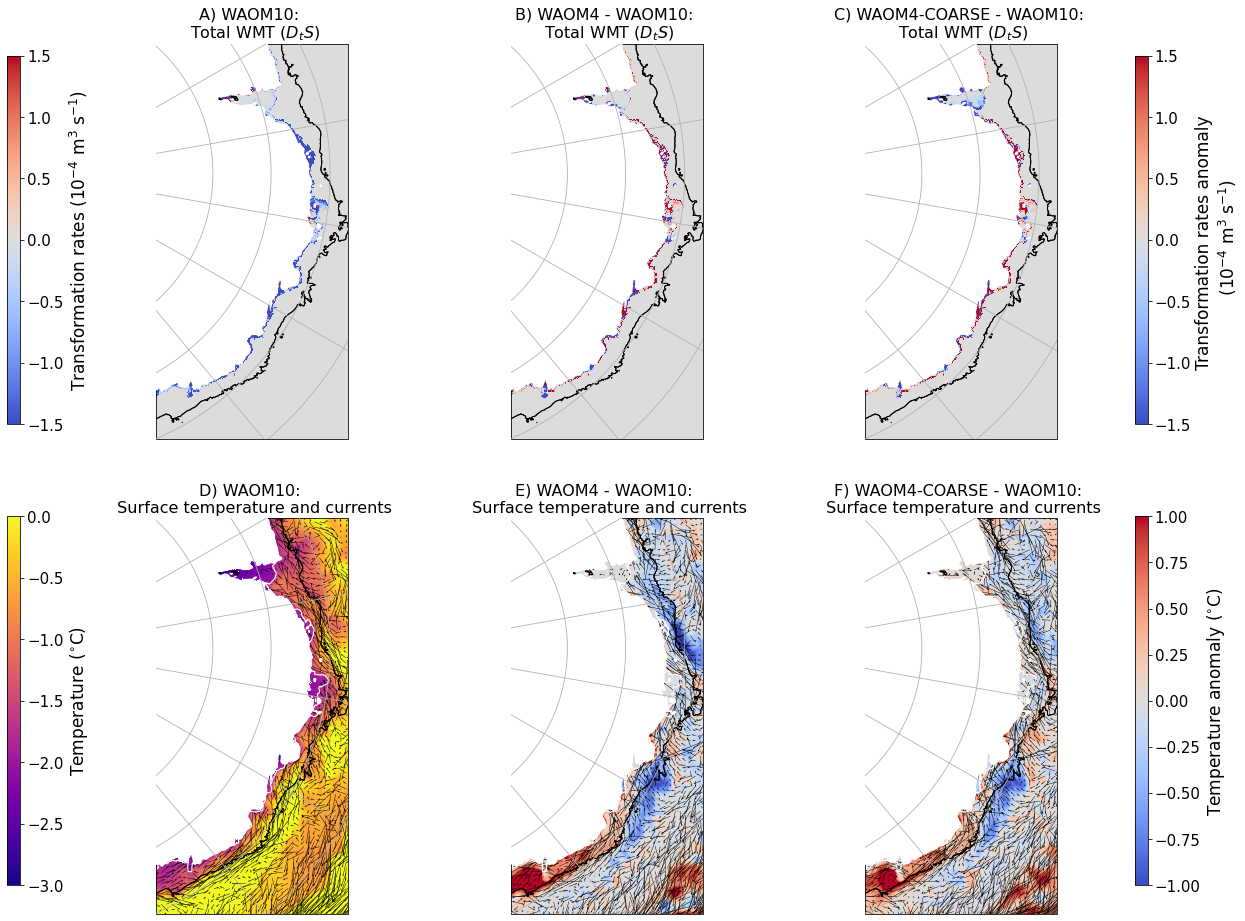

In [18]:
### Figures for the paper:

# 2) East Antarctica: only show WAOM10 x WAOM4 x WAOM4-COARSE: upper row
# Surface temperature and annual currents: lower row

## plots EAnt


# integrated from 27.2:27.8 kg m-3: peak of buoyancy gain

# indexes [imin:imax]
imin=7
imax=17

salt_net_EAnt_10 = np.nansum(np.squeeze(salt_net_10[imin:imax]), axis=0)
salt_net_EAnt_4 = np.nansum(np.squeeze(salt_net_4[imin:imax]), axis=0)
salt_net_EAnt_2 = np.nansum(np.squeeze(salt_net_2[imin:imax]), axis=0)
salt_net_EAnt_4nt = np.nansum(np.squeeze(salt_net_4nt[imin:imax]), axis=0)
salt_net_EAnt_4c = np.nansum(np.squeeze(salt_net_4c[imin:imax]), axis=0)

salt_adv_EAnt_10 = np.nansum(np.squeeze(salt_adv_10[imin:imax]), axis=0)
salt_adv_EAnt_4 = np.nansum(np.squeeze(salt_adv_4[imin:imax]), axis=0)
salt_adv_EAnt_2 = np.nansum(np.squeeze(salt_adv_2[imin:imax]), axis=0)
salt_adv_EAnt_4nt = np.nansum(np.squeeze(salt_adv_4nt[imin:imax]), axis=0)
salt_adv_EAnt_4c = np.nansum(np.squeeze(salt_adv_4c[imin:imax]), axis=0)

salt_diff_EAnt_10 = np.nansum(np.squeeze(salt_diff_10[imin:imax]), axis=0)
salt_diff_EAnt_4 = np.nansum(np.squeeze(salt_diff_4[imin:imax]), axis=0)
salt_diff_EAnt_2 = np.nansum(np.squeeze(salt_diff_2[imin:imax]), axis=0)
salt_diff_EAnt_4nt = np.nansum(np.squeeze(salt_diff_4nt[imin:imax]), axis=0)
salt_diff_EAnt_4c = np.nansum(np.squeeze(salt_diff_4c[imin:imax]), axis=0)

salt_vdiff_EAnt_10 = np.nansum(np.squeeze(salt_vdiff_10[imin:imax]), axis=0)
salt_vdiff_EAnt_4 = np.nansum(np.squeeze(salt_vdiff_4[imin:imax]), axis=0)
salt_vdiff_EAnt_2 = np.nansum(np.squeeze(salt_vdiff_2[imin:imax]), axis=0)
salt_vdiff_EAnt_4nt = np.nansum(np.squeeze(salt_vdiff_4nt[imin:imax]), axis=0)
salt_vdiff_EAnt_4c = np.nansum(np.squeeze(salt_vdiff_4c[imin:imax]), axis=0)

salt_hdiff_EAnt_10 = np.nansum(np.squeeze(salt_hdiff_10[imin:imax]), axis=0)
salt_hdiff_EAnt_4 = np.nansum(np.squeeze(salt_hdiff_4[imin:imax]), axis=0)
salt_hdiff_EAnt_2 = np.nansum(np.squeeze(salt_hdiff_2[imin:imax]), axis=0)
salt_hdiff_EAnt_4nt = np.nansum(np.squeeze(salt_hdiff_4nt[imin:imax]), axis=0)
salt_hdiff_EAnt_4c = np.nansum(np.squeeze(salt_hdiff_4c[imin:imax]), axis=0)

salt_sfc_EAnt_10 = np.nansum(np.squeeze(salt_sfc_10[imin:imax]), axis=0)
salt_sfc_EAnt_4 = np.nansum(np.squeeze(salt_sfc_4[imin:imax]), axis=0)
salt_sfc_EAnt_2 = np.nansum(np.squeeze(salt_sfc_2[imin:imax]), axis=0)
salt_sfc_EAnt_4nt = np.nansum(np.squeeze(salt_sfc_4nt[imin:imax]), axis=0)
salt_sfc_EAnt_4c = np.nansum(np.squeeze(salt_sfc_4c[imin:imax]), axis=0)

# interpolate transformation maps to 10km grid to show difference:

#salt_vdiff_Wed_4
salt_vdiff_EAnt_4_interp = pyresample.kd_tree.resample_custom(w4_def,salt_vdiff_EAnt_4,w10_def,\
                                         radius_of_influence=300000,neighbours=10,weight_funcs=wf)
salt_vdiff_EAnt_4c_interp = pyresample.kd_tree.resample_custom(w4_def,salt_vdiff_EAnt_4c,w10_def,\
                                         radius_of_influence=300000,neighbours=10,weight_funcs=wf)

# limits for contour of ice front (East Antarctica):
xlimit = np.arange(250,2500,1)
ylimit = np.arange(2000,3000,1)

## Final plots:
# [LHS]    NET - (ADV + HDIFF)   =   VDIFF + SFC_FLX   [RHS]

# scale for WMT rates:
scl = 1e4

fig = plt.figure(figsize=(18,16))

ax1 = fig.add_subplot(2,3,1, projection=proj)
plt.title('A) WAOM10: \n Total WMT ($D_t S$)', fontsize=16)
cy=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_vdiff_EAnt_10*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1.5, vmax=1.5)
ax1.gridlines(zorder=4)
ax1.set_extent([65, 150, -70, -63.5], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)
plt.ylabel('WAOM10',fontsize=16)

ax2 = fig.add_subplot(2,3,2, projection=proj)
plt.title('B) WAOM4 - WAOM10: \n Total WMT ($D_t S$)', fontsize=16)
cyd=plt.pcolormesh(lon_rho_10,lat_rho_10,(salt_vdiff_EAnt_4_interp-salt_vdiff_EAnt_10)*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1.5, vmax=1.5)
# cy=plt.pcolormesh(lon_rho_4,lat_rho_4,salt_vdiff_EAnt_4*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1.5, vmax=1.5)
ax2.gridlines(zorder=4)
ax2.set_extent([65, 150, -70, -63.5], crs=ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

ax3 = fig.add_subplot(2,3,3, projection=proj)
plt.title('C) WAOM4-COARSE - WAOM10: \n Total WMT ($D_t S$)', fontsize=16)
cyd=plt.pcolormesh(lon_rho_10,lat_rho_10,(salt_vdiff_EAnt_4c_interp-salt_vdiff_EAnt_10)*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1.5, vmax=1.5)
# cy=plt.pcolormesh(lon_rho_4,lat_rho_4,salt_vdiff_EAnt_4c*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1.5, vmax=1.5)
ax3.gridlines(zorder=4)
ax3.set_extent([65, 150, -70, -63.5], crs=ccrs.PlateCarree())
ax3.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

# set colorbar
cbar_ax0 = fig.add_axes([0.05, 0.55, 0.01, 0.32])
fig.colorbar(cy, cax=cbar_ax0, orientation='vertical')
cbar_ax0.set_ylabel('Transformation rates (10$^{-4}$ m$^{3}$ s$^{-1}$)', fontsize=17)#, labelpad=-35)
cbar_ax0.tick_params(labelsize=15)

# set colorbar diff
cbar_ax1 = fig.add_axes([0.92, 0.55, 0.01, 0.32])
fig.colorbar(cyd, cax=cbar_ax1, orientation='vertical')
cbar_ax1.set_ylabel('Transformation rates anomaly \n (10$^{-4}$ m$^{3}$ s$^{-1}$)', fontsize=17)#, labelpad=-35)
cbar_ax1.tick_params(labelsize=15)

# temperature and currents (annual)
tmin=-3
tmax=0

# spacing for current vectors:
vs10=5
vs4=12
vs2=24

ax4 = fig.add_subplot(2,3,4, projection=proj)
ct1=plt.pcolormesh(lon_rho_10,lat_rho_10,temp_ann_sfc_10, transform=ccrs.PlateCarree(), cmap=plt.cm.plasma, vmin=tmin, vmax=tmax)
cv=ax4.quiver(xs_10[::vs10,::vs10],ys_10[::vs10,::vs10],u_10_sfc[::vs10,::vs10],v_10_sfc[::vs10,::vs10], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('D) WAOM10: \n Surface temperature and currents', fontsize=16)
ax4.gridlines(zorder=4)
ax4.set_extent([65, 150, -70, -63.5], crs=ccrs.PlateCarree())
ax4.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

# for anomalies
atmin=-1
atmax=1

ax5 = fig.add_subplot(2,3,5, projection=proj)
ct2=plt.pcolormesh(lon_rho_10,lat_rho_10,temp_ann_sfc_4-temp_ann_sfc_10, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
cv=ax5.quiver(xs_4[::vs4,::vs4],ys_4[::vs4,::vs4],u_4_sfc[::vs4,::vs4],v_4_sfc[::vs4,::vs4], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('E) WAOM4 - WAOM10: \n Surface temperature and currents', fontsize=16)
ax5.gridlines(zorder=4)
ax5.set_extent([65, 150, -70, -63.5], crs=ccrs.PlateCarree())
ax5.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

ax6 = fig.add_subplot(2,3,6, projection=proj)
ct2=plt.pcolormesh(lon_rho_10,lat_rho_10,temp_ann_sfc_4c-temp_ann_sfc_10, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
cv=ax6.quiver(xs_4[::vs4,::vs4],ys_4[::vs4,::vs4],u_4c_sfc[::vs4,::vs4],v_4c_sfc[::vs4,::vs4], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('F) WAOM4-COARSE - WAOM10: \n Surface temperature and currents', fontsize=16)
ax6.gridlines(zorder=4)
ax6.set_extent([65, 150, -70, -63.5], crs=ccrs.PlateCarree())
ax6.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

## set colorbar
cbar_ax2 = fig.add_axes([0.05, 0.15, 0.01, 0.32])
fig.colorbar(ct1, cax=cbar_ax2, orientation='vertical')
cbar_ax2.set_ylabel('Temperature ($^{\circ}$C)', fontsize=17)#, labelpad=-35)
cbar_ax2.tick_params(labelsize=15)

cbar_ax3 = fig.add_axes([0.92, 0.15, 0.01, 0.32])
fig.colorbar(ct2, cax=cbar_ax3, orientation='vertical')
cbar_ax3.set_ylabel('Temperature anomaly ($^{\circ}$C)', fontsize=17)#, labelpad=-35)
cbar_ax3.tick_params(labelsize=15)

name_fig="waom10x4x4c_WMTmaps_Full_salt_sfc_tempVel_iceshelf_EAnt_27.2-27.8kgm-3.png"
plt.savefig(fig_path + name_fig, dpi=300)
plt.show()


/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are no

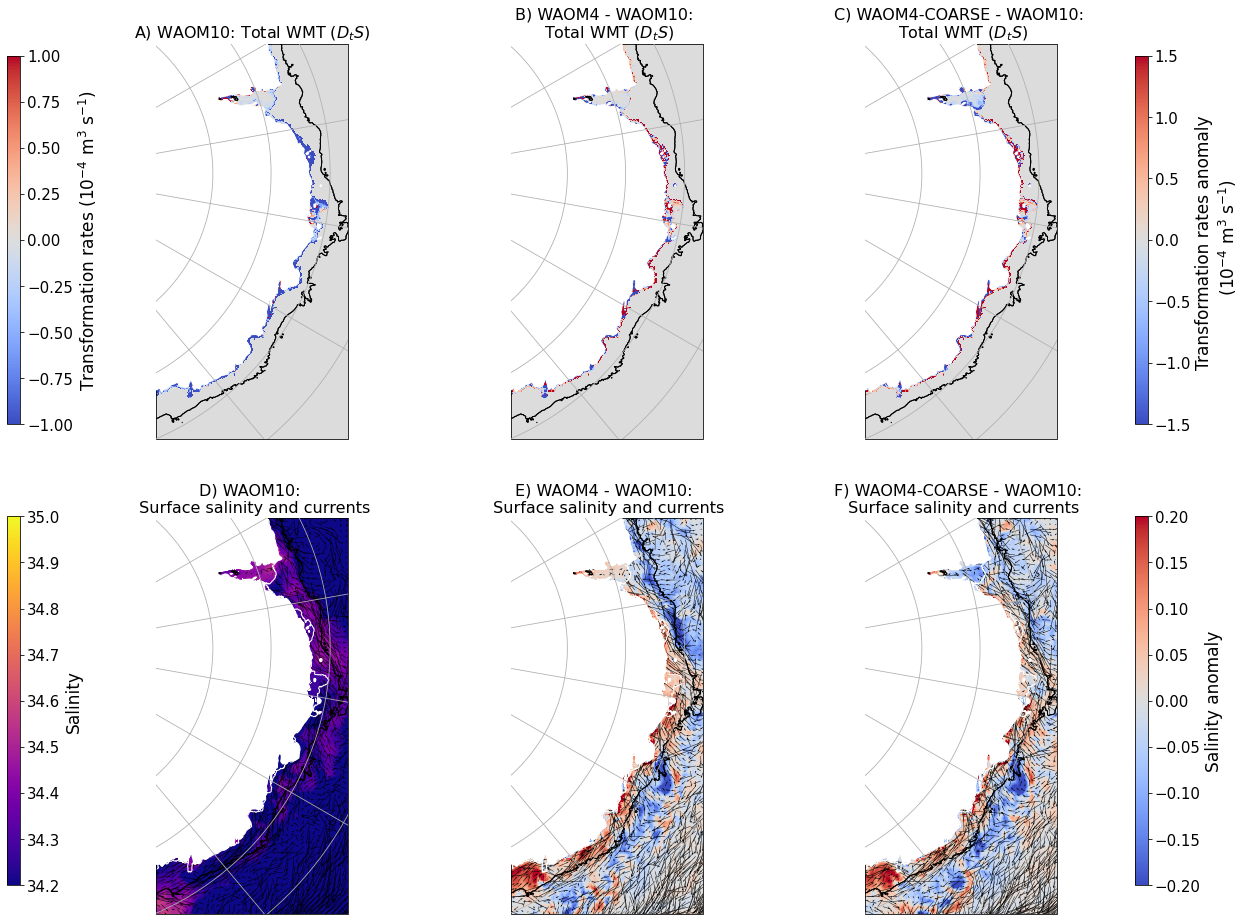

In [19]:
### Figures for the paper:

# 2) East Antarctica: only show WAOM10 x WAOM4 x WAOM4-COARSE: upper row
# Surface temperature and annual currents: lower row

## plots EAnt


# integrated from 27.2:27.8 kg m-3: peak of buoyancy gain

# indexes [imin:imax]
imin=7
imax=17

salt_net_EAnt_10 = np.nansum(np.squeeze(salt_net_10[imin:imax]), axis=0)
salt_net_EAnt_4 = np.nansum(np.squeeze(salt_net_4[imin:imax]), axis=0)
salt_net_EAnt_2 = np.nansum(np.squeeze(salt_net_2[imin:imax]), axis=0)
salt_net_EAnt_4nt = np.nansum(np.squeeze(salt_net_4nt[imin:imax]), axis=0)
salt_net_EAnt_4c = np.nansum(np.squeeze(salt_net_4c[imin:imax]), axis=0)

salt_adv_EAnt_10 = np.nansum(np.squeeze(salt_adv_10[imin:imax]), axis=0)
salt_adv_EAnt_4 = np.nansum(np.squeeze(salt_adv_4[imin:imax]), axis=0)
salt_adv_EAnt_2 = np.nansum(np.squeeze(salt_adv_2[imin:imax]), axis=0)
salt_adv_EAnt_4nt = np.nansum(np.squeeze(salt_adv_4nt[imin:imax]), axis=0)
salt_adv_EAnt_4c = np.nansum(np.squeeze(salt_adv_4c[imin:imax]), axis=0)

salt_diff_EAnt_10 = np.nansum(np.squeeze(salt_diff_10[imin:imax]), axis=0)
salt_diff_EAnt_4 = np.nansum(np.squeeze(salt_diff_4[imin:imax]), axis=0)
salt_diff_EAnt_2 = np.nansum(np.squeeze(salt_diff_2[imin:imax]), axis=0)
salt_diff_EAnt_4nt = np.nansum(np.squeeze(salt_diff_4nt[imin:imax]), axis=0)
salt_diff_EAnt_4c = np.nansum(np.squeeze(salt_diff_4c[imin:imax]), axis=0)

salt_vdiff_EAnt_10 = np.nansum(np.squeeze(salt_vdiff_10[imin:imax]), axis=0)
salt_vdiff_EAnt_4 = np.nansum(np.squeeze(salt_vdiff_4[imin:imax]), axis=0)
salt_vdiff_EAnt_2 = np.nansum(np.squeeze(salt_vdiff_2[imin:imax]), axis=0)
salt_vdiff_EAnt_4nt = np.nansum(np.squeeze(salt_vdiff_4nt[imin:imax]), axis=0)
salt_vdiff_EAnt_4c = np.nansum(np.squeeze(salt_vdiff_4c[imin:imax]), axis=0)

salt_hdiff_EAnt_10 = np.nansum(np.squeeze(salt_hdiff_10[imin:imax]), axis=0)
salt_hdiff_EAnt_4 = np.nansum(np.squeeze(salt_hdiff_4[imin:imax]), axis=0)
salt_hdiff_EAnt_2 = np.nansum(np.squeeze(salt_hdiff_2[imin:imax]), axis=0)
salt_hdiff_EAnt_4nt = np.nansum(np.squeeze(salt_hdiff_4nt[imin:imax]), axis=0)
salt_hdiff_EAnt_4c = np.nansum(np.squeeze(salt_hdiff_4c[imin:imax]), axis=0)

salt_sfc_EAnt_10 = np.nansum(np.squeeze(salt_sfc_10[imin:imax]), axis=0)
salt_sfc_EAnt_4 = np.nansum(np.squeeze(salt_sfc_4[imin:imax]), axis=0)
salt_sfc_EAnt_2 = np.nansum(np.squeeze(salt_sfc_2[imin:imax]), axis=0)
salt_sfc_EAnt_4nt = np.nansum(np.squeeze(salt_sfc_4nt[imin:imax]), axis=0)
salt_sfc_EAnt_4c = np.nansum(np.squeeze(salt_sfc_4c[imin:imax]), axis=0)


# limits for contour of ice front (East Antarctica):
xlimit = np.arange(250,2500,1)
ylimit = np.arange(2000,3000,1)

## Final plots:
# [LHS]    NET - (ADV + HDIFF)   =   VDIFF + SFC_FLX   [RHS]

# scale for WMT rates:
scl = 1e4

fig = plt.figure(figsize=(18,16))

ax1 = fig.add_subplot(2,3,1, projection=proj)
plt.title('A) WAOM10: Total WMT ($D_t S$)', fontsize=16)
cy=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_vdiff_EAnt_10*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1, vmax=1)
ax1.gridlines(zorder=4)
ax1.set_extent([65, 150, -70, -63.5], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)
plt.ylabel('WAOM10',fontsize=16)

ax2 = fig.add_subplot(2,3,2, projection=proj)
plt.title('B) WAOM4 - WAOM10: \n Total WMT ($D_t S$)', fontsize=16)
cyd=plt.pcolormesh(lon_rho_10,lat_rho_10,(salt_vdiff_EAnt_4_interp-salt_vdiff_EAnt_10)*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1.5, vmax=1.5)
# cy=plt.pcolormesh(lon_rho_4,lat_rho_4,salt_vdiff_EAnt_4*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1.5, vmax=1.5)
ax2.gridlines(zorder=4)
ax2.set_extent([65, 150, -70, -63.5], crs=ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

ax3 = fig.add_subplot(2,3,3, projection=proj)
plt.title('C) WAOM4-COARSE - WAOM10: \n Total WMT ($D_t S$)', fontsize=16)
cyd=plt.pcolormesh(lon_rho_10,lat_rho_10,(salt_vdiff_EAnt_4c_interp-salt_vdiff_EAnt_10)*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1.5, vmax=1.5)
# cy=plt.pcolormesh(lon_rho_4,lat_rho_4,salt_vdiff_EAnt_4c*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1.5, vmax=1.5)
ax3.gridlines(zorder=4)
ax3.set_extent([65, 150, -70, -63.5], crs=ccrs.PlateCarree())
ax3.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

# set colorbar
cbar_ax0 = fig.add_axes([0.05, 0.55, 0.01, 0.32])
fig.colorbar(cy, cax=cbar_ax0, orientation='vertical')
cbar_ax0.set_ylabel('Transformation rates (10$^{-4}$ m$^{3}$ s$^{-1}$)', fontsize=17)#, labelpad=-35)
cbar_ax0.tick_params(labelsize=15)

# set colorbar diff
cbar_ax1 = fig.add_axes([0.92, 0.55, 0.01, 0.32])
fig.colorbar(cyd, cax=cbar_ax1, orientation='vertical')
cbar_ax1.set_ylabel('Transformation rates anomaly \n (10$^{-4}$ m$^{3}$ s$^{-1}$)', fontsize=17)#, labelpad=-35)
cbar_ax1.tick_params(labelsize=15)

# temperature and currents (annual)
tmin=34.2
tmax=35

# spacing for current vectors:
vs10=5
vs4=12
vs2=24

ax4 = fig.add_subplot(2,3,4, projection=proj)
ct1=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_ann_sfc_10, transform=ccrs.PlateCarree(), cmap=plt.cm.plasma, vmin=tmin, vmax=tmax)
cv=ax4.quiver(xs_10[::vs10,::vs10],ys_10[::vs10,::vs10],u_10_sfc[::vs10,::vs10],v_10_sfc[::vs10,::vs10], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('D) WAOM10: \n Surface salinity and currents', fontsize=16)
ax4.gridlines(zorder=4)
ax4.set_extent([65, 150, -70, -63.5], crs=ccrs.PlateCarree())
ax4.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

# for anomalies
atmin=-.2
atmax=.2

ax5 = fig.add_subplot(2,3,5, projection=proj)
ct2=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_ann_sfc_4-salt_ann_sfc_10, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
cv=ax5.quiver(xs_4[::vs4,::vs4],ys_4[::vs4,::vs4],u_4_sfc[::vs4,::vs4],v_4_sfc[::vs4,::vs4], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('E) WAOM4 - WAOM10: \n Surface salinity and currents', fontsize=16)
ax5.gridlines(zorder=4)
ax5.set_extent([65, 150, -70, -63.5], crs=ccrs.PlateCarree())
ax5.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

ax6 = fig.add_subplot(2,3,6, projection=proj)
ct2=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_ann_sfc_4c-salt_ann_sfc_10, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
cv=ax6.quiver(xs_4[::vs4,::vs4],ys_4[::vs4,::vs4],u_4c_sfc[::vs4,::vs4],v_4c_sfc[::vs4,::vs4], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('F) WAOM4-COARSE - WAOM10: \n Surface salinity and currents', fontsize=16)
ax6.gridlines(zorder=4)
ax6.set_extent([65, 150, -70, -63.5], crs=ccrs.PlateCarree())
ax6.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

## set colorbar
cbar_ax2 = fig.add_axes([0.05, 0.15, 0.01, 0.32])
fig.colorbar(ct1, cax=cbar_ax2, orientation='vertical')
cbar_ax2.set_ylabel('Salinity', fontsize=17)#, labelpad=-35)
cbar_ax2.tick_params(labelsize=15)

cbar_ax3 = fig.add_axes([0.92, 0.15, 0.01, 0.32])
fig.colorbar(ct2, cax=cbar_ax3, orientation='vertical')
cbar_ax3.set_ylabel('Salinity anomaly', fontsize=17)#, labelpad=-35)
cbar_ax3.tick_params(labelsize=15)

name_fig="waom10x4x4c_WMTmaps_Full_salt_sfc_saltVel_iceshelf_EAnt_27.2-27.8kgm-3.png"
plt.savefig(fig_path + name_fig, dpi=300)
plt.show()


/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are no

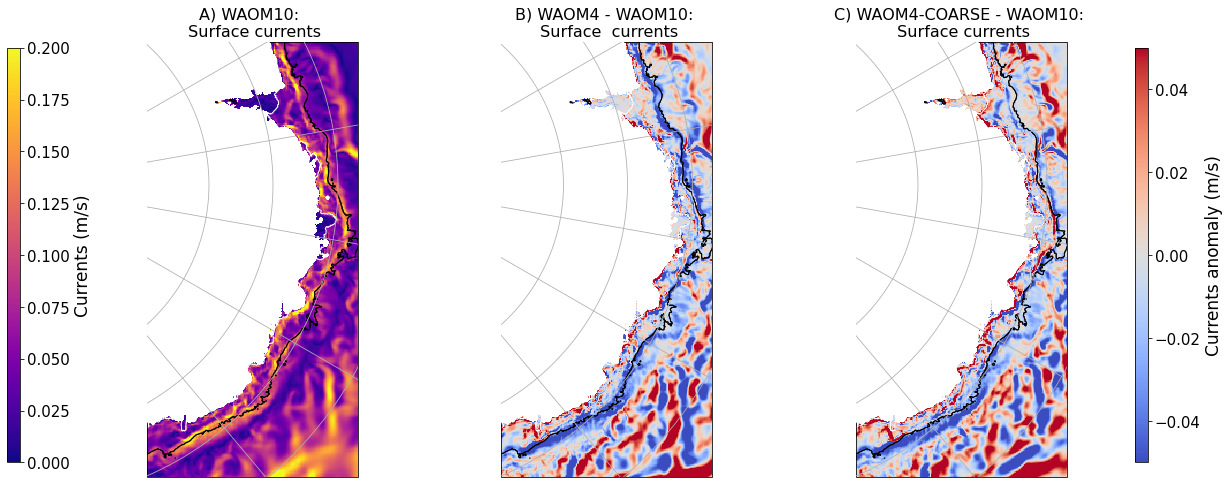

In [20]:
# limits for contour of ice front (East Antarctica):
xlimit = np.arange(250,2500,1)
ylimit = np.arange(2000,3000,1)

# scale for WMT rates:
scl = 1e4


fig = plt.figure(figsize=(18,8))

# currents (annual)
tmin=0
tmax=.2

# spacing for current vectors:
vs10=5
vs4=12


ax4 = fig.add_subplot(1,3,1, projection=proj)
ct1=plt.pcolormesh(lon_rho_10,lat_rho_10,V10_sfc, transform=ccrs.PlateCarree(), cmap=plt.cm.plasma, vmin=tmin, vmax=tmax)
# cv=ax4.quiver(xs_10[::vs10,::vs10],ys_10[::vs10,::vs10],u_10_sfc[::vs10,::vs10],v_10_sfc[::vs10,::vs10], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('A) WAOM10: \n Surface currents', fontsize=16)
ax4.gridlines(zorder=4)
ax4.set_extent([65, 150, -70, -63.5], crs=ccrs.PlateCarree())
ax4.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

# for anomalies
atmin=-.05
atmax=.05

ax5 = fig.add_subplot(1,3,2, projection=proj)
ct2=plt.pcolormesh(lon_rho_10,lat_rho_10,V4_sfc_interp-V10_sfc, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
# cv=ax5.quiver(xs_4[::vs4,::vs4],ys_4[::vs4,::vs4],u_4_sfc[::vs4,::vs4],v_4_sfc[::vs4,::vs4], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('B) WAOM4 - WAOM10: \n Surface  currents', fontsize=16)
ax5.gridlines(zorder=4)
ax5.set_extent([65, 150, -70, -63.5], crs=ccrs.PlateCarree())
ax5.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

ax6 = fig.add_subplot(1,3,3, projection=proj)
ct2=plt.pcolormesh(lon_rho_10,lat_rho_10,V4c_sfc_interp-V10_sfc, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
# cv=ax6.quiver(xs_4[::vs4,::vs4],ys_4[::vs4,::vs4],u_4c_sfc[::vs4,::vs4],v_4c_sfc[::vs4,::vs4], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('C) WAOM4-COARSE - WAOM10: \n Surface currents', fontsize=16)
ax6.gridlines(zorder=4)
ax6.set_extent([65, 150, -70, -63.5], crs=ccrs.PlateCarree())
ax6.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

## set colorbar
cbar_ax2 = fig.add_axes([0.05, 0.15, 0.01, 0.72])
fig.colorbar(ct1, cax=cbar_ax2, orientation='vertical')
cbar_ax2.set_ylabel('Currents (m/s)', fontsize=17)#, labelpad=-35)
cbar_ax2.tick_params(labelsize=15)

cbar_ax3 = fig.add_axes([0.92, 0.15, 0.01, 0.72])
fig.colorbar(ct2, cax=cbar_ax3, orientation='vertical')
cbar_ax3.set_ylabel('Currents anomaly (m/s)', fontsize=17)#, labelpad=-35)
cbar_ax3.tick_params(labelsize=15)

name_fig="waom10x4x4c_WMTmaps_Full_salt_sfc_Vel_iceshelf_EAnt_27.2-27.8kgm-3.png"
plt.savefig(fig_path + name_fig, dpi=300)
plt.show()

/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/pyresample/kd_tree.py:384: UserWarning: Possible more than 10 neighbours within 300000 m for some data points
  warnings.warn(('Possible more than %s neighbours '
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = matplotlib.ax

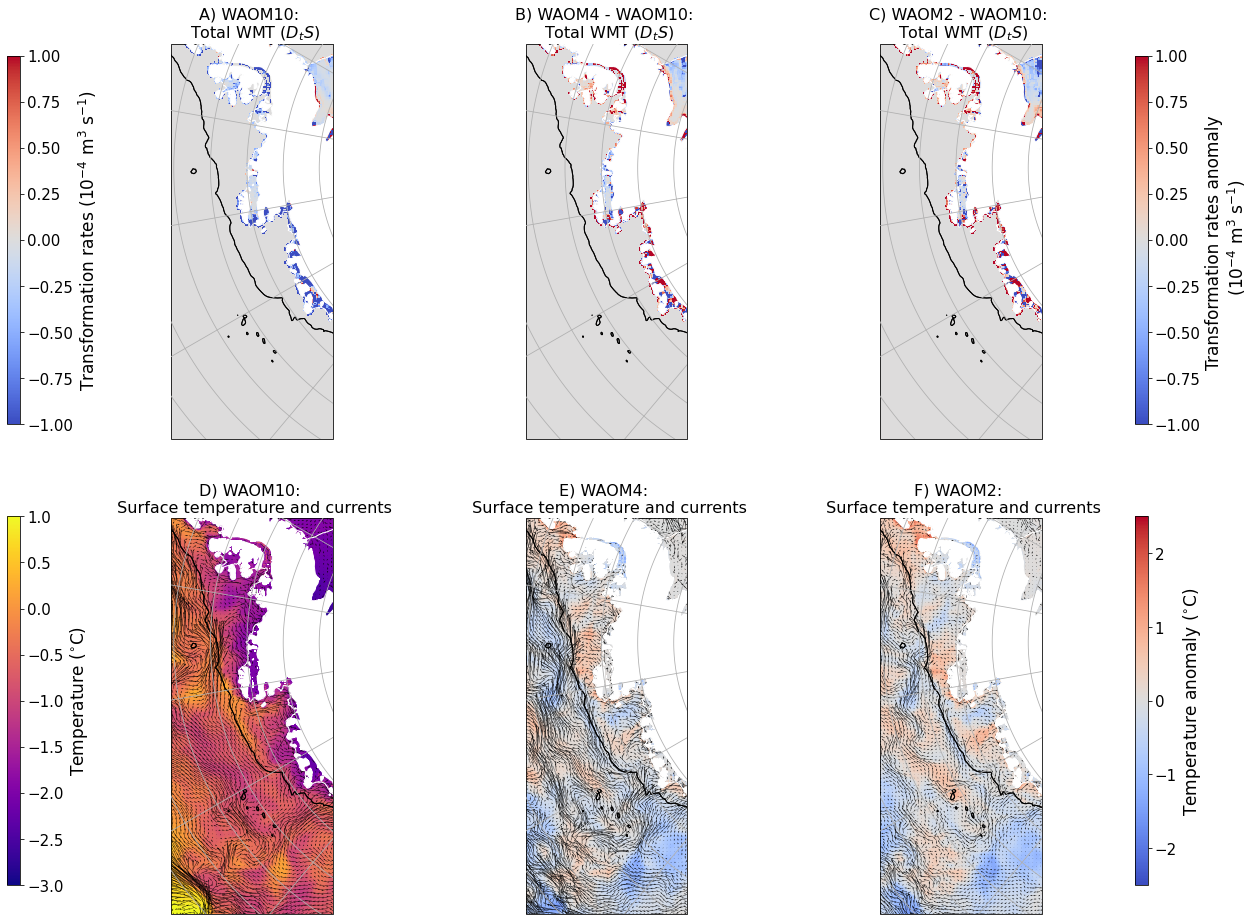

In [21]:
### Figures for the paper:

# 3) West Antarctica: only show WAOM10 x WAOM4 x WAOM2: upper row
# Surface temperature and annual currents: lower row

## plots WAnt


# integrated from 27.2:27.8 kg m-3: peak of buoyancy gain

# indexes [imin:imax]
imin=7
imax=17

salt_net_WAnt_10 = np.nansum(np.squeeze(salt_net_10[imin:imax]), axis=0)
salt_net_WAnt_4 = np.nansum(np.squeeze(salt_net_4[imin:imax]), axis=0)
salt_net_WAnt_2 = np.nansum(np.squeeze(salt_net_2[imin:imax]), axis=0)
salt_net_WAnt_4nt = np.nansum(np.squeeze(salt_net_4nt[imin:imax]), axis=0)
salt_net_WAnt_4c = np.nansum(np.squeeze(salt_net_4c[imin:imax]), axis=0)

salt_adv_WAnt_10 = np.nansum(np.squeeze(salt_adv_10[imin:imax]), axis=0)
salt_adv_WAnt_4 = np.nansum(np.squeeze(salt_adv_4[imin:imax]), axis=0)
salt_adv_WAnt_2 = np.nansum(np.squeeze(salt_adv_2[imin:imax]), axis=0)
salt_adv_WAnt_4nt = np.nansum(np.squeeze(salt_adv_4nt[imin:imax]), axis=0)
salt_adv_WAnt_4c = np.nansum(np.squeeze(salt_adv_4c[imin:imax]), axis=0)

salt_diff_WAnt_10 = np.nansum(np.squeeze(salt_diff_10[imin:imax]), axis=0)
salt_diff_WAnt_4 = np.nansum(np.squeeze(salt_diff_4[imin:imax]), axis=0)
salt_diff_WAnt_2 = np.nansum(np.squeeze(salt_diff_2[imin:imax]), axis=0)
salt_diff_WAnt_4nt = np.nansum(np.squeeze(salt_diff_4nt[imin:imax]), axis=0)
salt_diff_WAnt_4c = np.nansum(np.squeeze(salt_diff_4c[imin:imax]), axis=0)

salt_vdiff_WAnt_10 = np.nansum(np.squeeze(salt_vdiff_10[imin:imax]), axis=0)
salt_vdiff_WAnt_4 = np.nansum(np.squeeze(salt_vdiff_4[imin:imax]), axis=0)
salt_vdiff_WAnt_2 = np.nansum(np.squeeze(salt_vdiff_2[imin:imax]), axis=0)
salt_vdiff_WAnt_4nt = np.nansum(np.squeeze(salt_vdiff_4nt[imin:imax]), axis=0)
salt_vdiff_WAnt_4c = np.nansum(np.squeeze(salt_vdiff_4c[imin:imax]), axis=0)

salt_hdiff_WAnt_10 = np.nansum(np.squeeze(salt_hdiff_10[imin:imax]), axis=0)
salt_hdiff_WAnt_4 = np.nansum(np.squeeze(salt_hdiff_4[imin:imax]), axis=0)
salt_hdiff_WAnt_2 = np.nansum(np.squeeze(salt_hdiff_2[imin:imax]), axis=0)
salt_hdiff_WAnt_4nt = np.nansum(np.squeeze(salt_hdiff_4nt[imin:imax]), axis=0)
salt_hdiff_WAnt_4c = np.nansum(np.squeeze(salt_hdiff_4c[imin:imax]), axis=0)

salt_sfc_WAnt_10 = np.nansum(np.squeeze(salt_sfc_10[imin:imax]), axis=0)
salt_sfc_WAnt_4 = np.nansum(np.squeeze(salt_sfc_4[imin:imax]), axis=0)
salt_sfc_WAnt_2 = np.nansum(np.squeeze(salt_sfc_2[imin:imax]), axis=0)
salt_sfc_WAnt_4nt = np.nansum(np.squeeze(salt_sfc_4nt[imin:imax]), axis=0)
salt_sfc_WAnt_4c = np.nansum(np.squeeze(salt_sfc_4c[imin:imax]), axis=0)

# interpolate transformation maps to 10km grid to show difference:

#salt_vdiff_Wed_4
salt_vdiff_WAnt_4_interp = pyresample.kd_tree.resample_custom(w4_def,salt_vdiff_WAnt_4,w10_def,\
                                         radius_of_influence=300000,neighbours=10,weight_funcs=wf)
salt_vdiff_WAnt_2_interp = pyresample.kd_tree.resample_custom(w2_def,salt_vdiff_WAnt_2,w10_def,\
                                         radius_of_influence=5000,neighbours=1,weight_funcs=wf)


# limits for contour of ice front (West Antarct. IS):
xlimit = np.arange(500,2800,1)
ylimit = np.arange(250,1250,1)

## Final plots:
# [LHS]    NET - (ADV + HDIFF)   =   VDIFF + SFC_FLX   [RHS]

# scale for WMT rates:
scl = 1e4

fig = plt.figure(figsize=(18,16))

ax1 = fig.add_subplot(2,3,1, projection=proj)
plt.title('A) WAOM10: \n Total WMT ($D_t S$)', fontsize=16)
cy=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_vdiff_WAnt_10*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1, vmax=1)
ax1.gridlines(zorder=4)
ax1.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)
plt.ylabel('WAOM10',fontsize=16)

ax2 = fig.add_subplot(2,3,2, projection=proj)
plt.title('B) WAOM4 - WAOM10: \n Total WMT ($D_t S$)', fontsize=16)
cyd=plt.pcolormesh(lon_rho_10,lat_rho_10,(salt_vdiff_WAnt_4_interp-salt_vdiff_WAnt_10)*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1, vmax=1)
# cy=plt.pcolormesh(lon_rho_4,lat_rho_4,salt_vdiff_WAnt_4*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1, vmax=1)
ax2.gridlines(zorder=4)
ax2.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

ax3 = fig.add_subplot(2,3,3, projection=proj)
plt.title('C) WAOM2 - WAOM10: \n Total WMT ($D_t S$)', fontsize=16)
cyd=plt.pcolormesh(lon_rho_10,lat_rho_10,(salt_vdiff_WAnt_2_interp-salt_vdiff_WAnt_10)*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1, vmax=1)
# cy=plt.pcolormesh(lon_rho_2,lat_rho_2,salt_vdiff_WAnt_2*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1, vmax=1)
ax3.gridlines(zorder=4)
ax3.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax3.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

# set colorbar
cbar_ax0 = fig.add_axes([0.05, 0.55, 0.01, 0.32])
fig.colorbar(cy, cax=cbar_ax0, orientation='vertical')
cbar_ax0.set_ylabel('Transformation rates (10$^{-4}$ m$^{3}$ s$^{-1}$)', fontsize=17)#, labelpad=-35)
cbar_ax0.tick_params(labelsize=15)

# set colorbar diff
cbar_ax1 = fig.add_axes([0.92, 0.55, 0.01, 0.32])
fig.colorbar(cyd, cax=cbar_ax1, orientation='vertical')
cbar_ax1.set_ylabel('Transformation rates anomaly \n (10$^{-4}$ m$^{3}$ s$^{-1}$)', fontsize=17)#, labelpad=-35)
cbar_ax1.tick_params(labelsize=15)


# temperature and currents (annual)
tmin=-3
tmax=1
# spacing for current vectors:
vs10=3
vs4=7
vs2=14

ax4 = fig.add_subplot(2,3,4, projection=proj)
ct1=plt.pcolormesh(lon_rho_10,lat_rho_10,temp_ann_sfc_10, transform=ccrs.PlateCarree(), cmap=plt.cm.plasma, vmin=tmin, vmax=tmax)
cv=ax4.quiver(xs_10[::vs10,::vs10],ys_10[::vs10,::vs10],u_10_sfc[::vs10,::vs10],v_10_sfc[::vs10,::vs10], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('D) WAOM10: \n Surface temperature and currents', fontsize=16)
ax4.gridlines(zorder=4)
ax4.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax4.add_feature(cfeature.LAND, zorder=3, facecolor='white')
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

# for anomalies:
atmin=-2.5
atmax=2.5

ax5 = fig.add_subplot(2,3,5, projection=proj)
ct2=plt.pcolormesh(lon_rho_10,lat_rho_10,temp_ann_sfc_4-temp_ann_sfc_10, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
cv=ax5.quiver(xs_4[::vs4,::vs4],ys_4[::vs4,::vs4],u_4_sfc[::vs4,::vs4],v_4_sfc[::vs4,::vs4], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('E) WAOM4: \n Surface temperature and currents', fontsize=16)
ax5.gridlines(zorder=4)
ax5.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax5.add_feature(cfeature.LAND, zorder=3, facecolor='white')
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

ax6 = fig.add_subplot(2,3,6, projection=proj)
ct2=plt.pcolormesh(lon_rho_10,lat_rho_10,temp_ann_sfc_2-temp_ann_sfc_10, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
cv=ax6.quiver(xs_2[::vs2,::vs2],ys_2[::vs2,::vs2],u_2_sfc[::vs2,::vs2],v_2_sfc[::vs2,::vs2], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('F) WAOM2: \n Surface temperature and currents', fontsize=16)
ax6.gridlines(zorder=4)
ax6.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax6.add_feature(cfeature.LAND, zorder=3, facecolor='white')
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

# set colorbar
cbar_ax2 = fig.add_axes([0.05, 0.15, 0.01, 0.32])
fig.colorbar(ct1, cax=cbar_ax2, orientation='vertical')
cbar_ax2.set_ylabel('Temperature ($^{\circ}$C)', fontsize=17)#, labelpad=-35)
cbar_ax2.tick_params(labelsize=15)

cbar_ax3 = fig.add_axes([0.92, 0.15, 0.01, 0.32])
fig.colorbar(ct2, cax=cbar_ax3, orientation='vertical')
cbar_ax3.set_ylabel('Temperature anomaly ($^{\circ}$C)', fontsize=17)#, labelpad=-35)
cbar_ax3.tick_params(labelsize=15)

name_fig="waom10x4x2_WMTmaps_Full_salt_sfc_tempVel_iceshelf_WAnt_27.2-27.8kgm-3.png"
plt.savefig(fig_path + name_fig, dpi=300)
plt.show()


/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are no

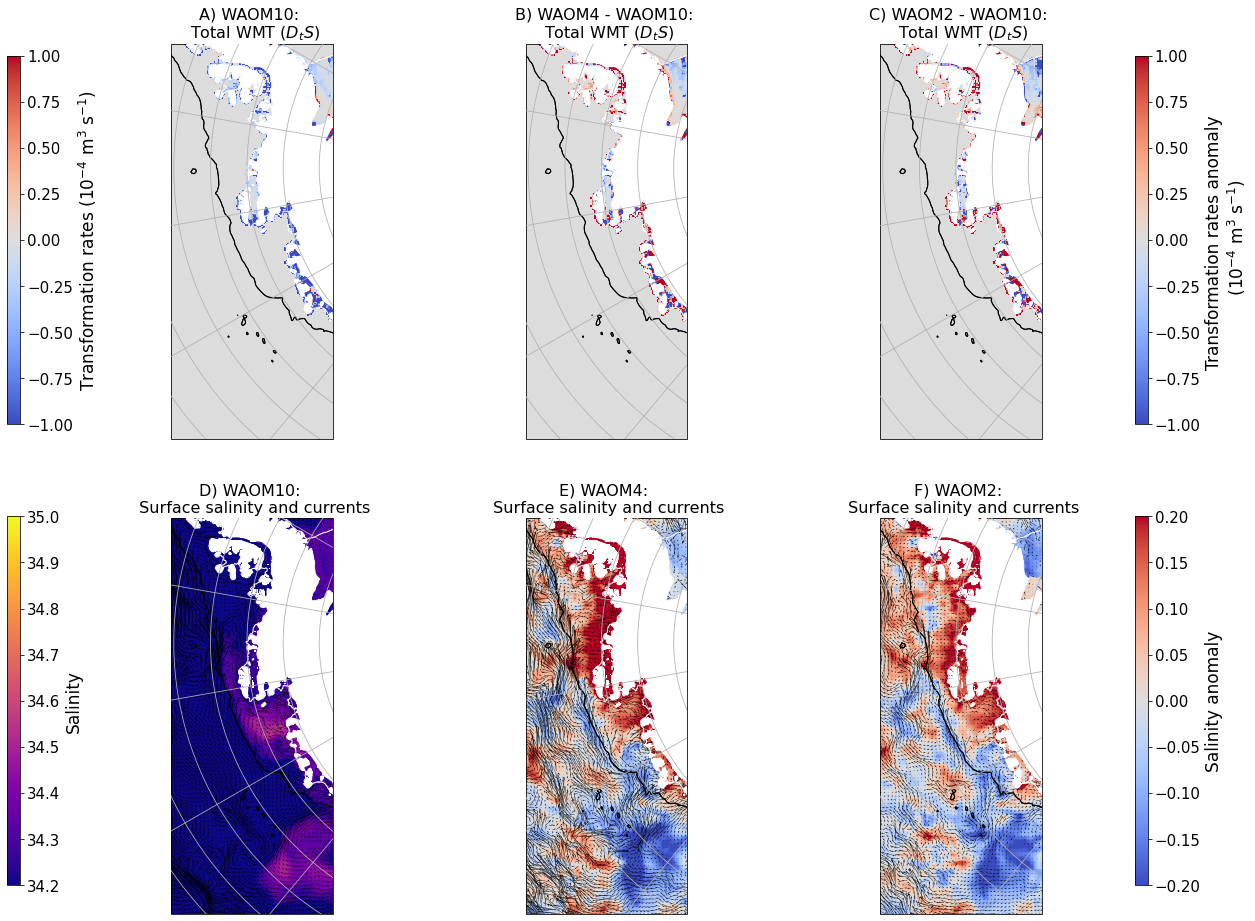

In [22]:
### Figures for the paper:

# 3) West Antarctica: only show WAOM10 x WAOM4 x WAOM2: upper row
# Surface salinity and annual currents: lower row

## plots WAnt


# integrated from 27.2:27.8 kg m-3: peak of buoyancy gain

# indexes [imin:imax]
imin=7
imax=17

salt_net_WAnt_10 = np.nansum(np.squeeze(salt_net_10[imin:imax]), axis=0)
salt_net_WAnt_4 = np.nansum(np.squeeze(salt_net_4[imin:imax]), axis=0)
salt_net_WAnt_2 = np.nansum(np.squeeze(salt_net_2[imin:imax]), axis=0)
salt_net_WAnt_4nt = np.nansum(np.squeeze(salt_net_4nt[imin:imax]), axis=0)
salt_net_WAnt_4c = np.nansum(np.squeeze(salt_net_4c[imin:imax]), axis=0)

salt_adv_WAnt_10 = np.nansum(np.squeeze(salt_adv_10[imin:imax]), axis=0)
salt_adv_WAnt_4 = np.nansum(np.squeeze(salt_adv_4[imin:imax]), axis=0)
salt_adv_WAnt_2 = np.nansum(np.squeeze(salt_adv_2[imin:imax]), axis=0)
salt_adv_WAnt_4nt = np.nansum(np.squeeze(salt_adv_4nt[imin:imax]), axis=0)
salt_adv_WAnt_4c = np.nansum(np.squeeze(salt_adv_4c[imin:imax]), axis=0)

salt_diff_WAnt_10 = np.nansum(np.squeeze(salt_diff_10[imin:imax]), axis=0)
salt_diff_WAnt_4 = np.nansum(np.squeeze(salt_diff_4[imin:imax]), axis=0)
salt_diff_WAnt_2 = np.nansum(np.squeeze(salt_diff_2[imin:imax]), axis=0)
salt_diff_WAnt_4nt = np.nansum(np.squeeze(salt_diff_4nt[imin:imax]), axis=0)
salt_diff_WAnt_4c = np.nansum(np.squeeze(salt_diff_4c[imin:imax]), axis=0)

salt_vdiff_WAnt_10 = np.nansum(np.squeeze(salt_vdiff_10[imin:imax]), axis=0)
salt_vdiff_WAnt_4 = np.nansum(np.squeeze(salt_vdiff_4[imin:imax]), axis=0)
salt_vdiff_WAnt_2 = np.nansum(np.squeeze(salt_vdiff_2[imin:imax]), axis=0)
salt_vdiff_WAnt_4nt = np.nansum(np.squeeze(salt_vdiff_4nt[imin:imax]), axis=0)
salt_vdiff_WAnt_4c = np.nansum(np.squeeze(salt_vdiff_4c[imin:imax]), axis=0)

salt_hdiff_WAnt_10 = np.nansum(np.squeeze(salt_hdiff_10[imin:imax]), axis=0)
salt_hdiff_WAnt_4 = np.nansum(np.squeeze(salt_hdiff_4[imin:imax]), axis=0)
salt_hdiff_WAnt_2 = np.nansum(np.squeeze(salt_hdiff_2[imin:imax]), axis=0)
salt_hdiff_WAnt_4nt = np.nansum(np.squeeze(salt_hdiff_4nt[imin:imax]), axis=0)
salt_hdiff_WAnt_4c = np.nansum(np.squeeze(salt_hdiff_4c[imin:imax]), axis=0)

salt_sfc_WAnt_10 = np.nansum(np.squeeze(salt_sfc_10[imin:imax]), axis=0)
salt_sfc_WAnt_4 = np.nansum(np.squeeze(salt_sfc_4[imin:imax]), axis=0)
salt_sfc_WAnt_2 = np.nansum(np.squeeze(salt_sfc_2[imin:imax]), axis=0)
salt_sfc_WAnt_4nt = np.nansum(np.squeeze(salt_sfc_4nt[imin:imax]), axis=0)
salt_sfc_WAnt_4c = np.nansum(np.squeeze(salt_sfc_4c[imin:imax]), axis=0)

# limits for contour of ice front (West Antarct. IS):
xlimit = np.arange(500,2800,1)
ylimit = np.arange(250,1250,1)

## Final plots:
# [LHS]    NET - (ADV + HDIFF)   =   VDIFF + SFC_FLX   [RHS]

# scale for WMT rates:
scl = 1e4

fig = plt.figure(figsize=(18,16))

ax1 = fig.add_subplot(2,3,1, projection=proj)
plt.title('A) WAOM10: \n Total WMT ($D_t S$)', fontsize=16)
cy=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_vdiff_WAnt_10*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1, vmax=1)
ax1.gridlines(zorder=4)
ax1.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)
plt.ylabel('WAOM10',fontsize=16)

ax2 = fig.add_subplot(2,3,2, projection=proj)
plt.title('B) WAOM4 - WAOM10: \n Total WMT ($D_t S$)', fontsize=16)
cyd=plt.pcolormesh(lon_rho_10,lat_rho_10,(salt_vdiff_WAnt_4_interp-salt_vdiff_WAnt_10)*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1, vmax=1)
# cy=plt.pcolormesh(lon_rho_4,lat_rho_4,salt_vdiff_WAnt_4*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1, vmax=1)
ax2.gridlines(zorder=4)
ax2.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

ax3 = fig.add_subplot(2,3,3, projection=proj)
plt.title('C) WAOM2 - WAOM10: \n Total WMT ($D_t S$)', fontsize=16)
cyd=plt.pcolormesh(lon_rho_10,lat_rho_10,(salt_vdiff_WAnt_2_interp-salt_vdiff_WAnt_10)*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1, vmax=1)
# cy=plt.pcolormesh(lon_rho_2,lat_rho_2,salt_vdiff_WAnt_2*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1, vmax=1)
ax3.gridlines(zorder=4)
ax3.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax3.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

# set colorbar
cbar_ax0 = fig.add_axes([0.05, 0.55, 0.01, 0.32])
fig.colorbar(cy, cax=cbar_ax0, orientation='vertical')
cbar_ax0.set_ylabel('Transformation rates (10$^{-4}$ m$^{3}$ s$^{-1}$)', fontsize=17)#, labelpad=-35)
cbar_ax0.tick_params(labelsize=15)

# set colorbar diff
cbar_ax1 = fig.add_axes([0.92, 0.55, 0.01, 0.32])
fig.colorbar(cyd, cax=cbar_ax1, orientation='vertical')
cbar_ax1.set_ylabel('Transformation rates anomaly \n (10$^{-4}$ m$^{3}$ s$^{-1}$)', fontsize=17)#, labelpad=-35)
cbar_ax1.tick_params(labelsize=15)


# salinity and currents (annual)
tmin=34.2
tmax=35
# spacing for current vectors:
vs10=3
vs4=7
vs2=14

ax4 = fig.add_subplot(2,3,4, projection=proj)
ct1=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_ann_sfc_10, transform=ccrs.PlateCarree(), cmap=plt.cm.plasma, vmin=tmin, vmax=tmax)
cv=ax4.quiver(xs_10[::vs10,::vs10],ys_10[::vs10,::vs10],u_10_sfc[::vs10,::vs10],v_10_sfc[::vs10,::vs10], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('D) WAOM10: \n Surface salinity and currents', fontsize=16)
ax4.gridlines(zorder=4)
ax4.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax4.add_feature(cfeature.LAND, zorder=3, facecolor='white')
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

# for anomalies:
atmin=-.2
atmax=.2

ax5 = fig.add_subplot(2,3,5, projection=proj)
ct2=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_ann_sfc_4-salt_ann_sfc_10, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
cv=ax5.quiver(xs_4[::vs4,::vs4],ys_4[::vs4,::vs4],u_4_sfc[::vs4,::vs4],v_4_sfc[::vs4,::vs4], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('E) WAOM4: \n Surface salinity and currents', fontsize=16)
ax5.gridlines(zorder=4)
ax5.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax5.add_feature(cfeature.LAND, zorder=3, facecolor='white')
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

ax6 = fig.add_subplot(2,3,6, projection=proj)
ct2=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_ann_sfc_2-salt_ann_sfc_10, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
cv=ax6.quiver(xs_2[::vs2,::vs2],ys_2[::vs2,::vs2],u_2_sfc[::vs2,::vs2],v_2_sfc[::vs2,::vs2], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('F) WAOM2: \n Surface salinity and currents', fontsize=16)
ax6.gridlines(zorder=4)
ax6.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax6.add_feature(cfeature.LAND, zorder=3, facecolor='white')
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

# set colorbar
cbar_ax2 = fig.add_axes([0.05, 0.15, 0.01, 0.32])
fig.colorbar(ct1, cax=cbar_ax2, orientation='vertical')
cbar_ax2.set_ylabel('Salinity', fontsize=17)#, labelpad=-35)
cbar_ax2.tick_params(labelsize=15)

cbar_ax3 = fig.add_axes([0.92, 0.15, 0.01, 0.32])
fig.colorbar(ct2, cax=cbar_ax3, orientation='vertical')
cbar_ax3.set_ylabel('Salinity anomaly', fontsize=17)#, labelpad=-35)
cbar_ax3.tick_params(labelsize=15)

name_fig="waom10x4x2_WMTmaps_Full_salt_sfc_saltVel_iceshelf_WAnt_27.2-27.8kgm-3.png"
plt.savefig(fig_path + name_fig, dpi=300)
plt.show()


/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/pyresample/kd_tree.py:384: UserWarning: Possible more than 10 neighbours within 300000 m for some data points
  warnings.warn(('Possible more than %s neighbours '
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = matplotlib.ax

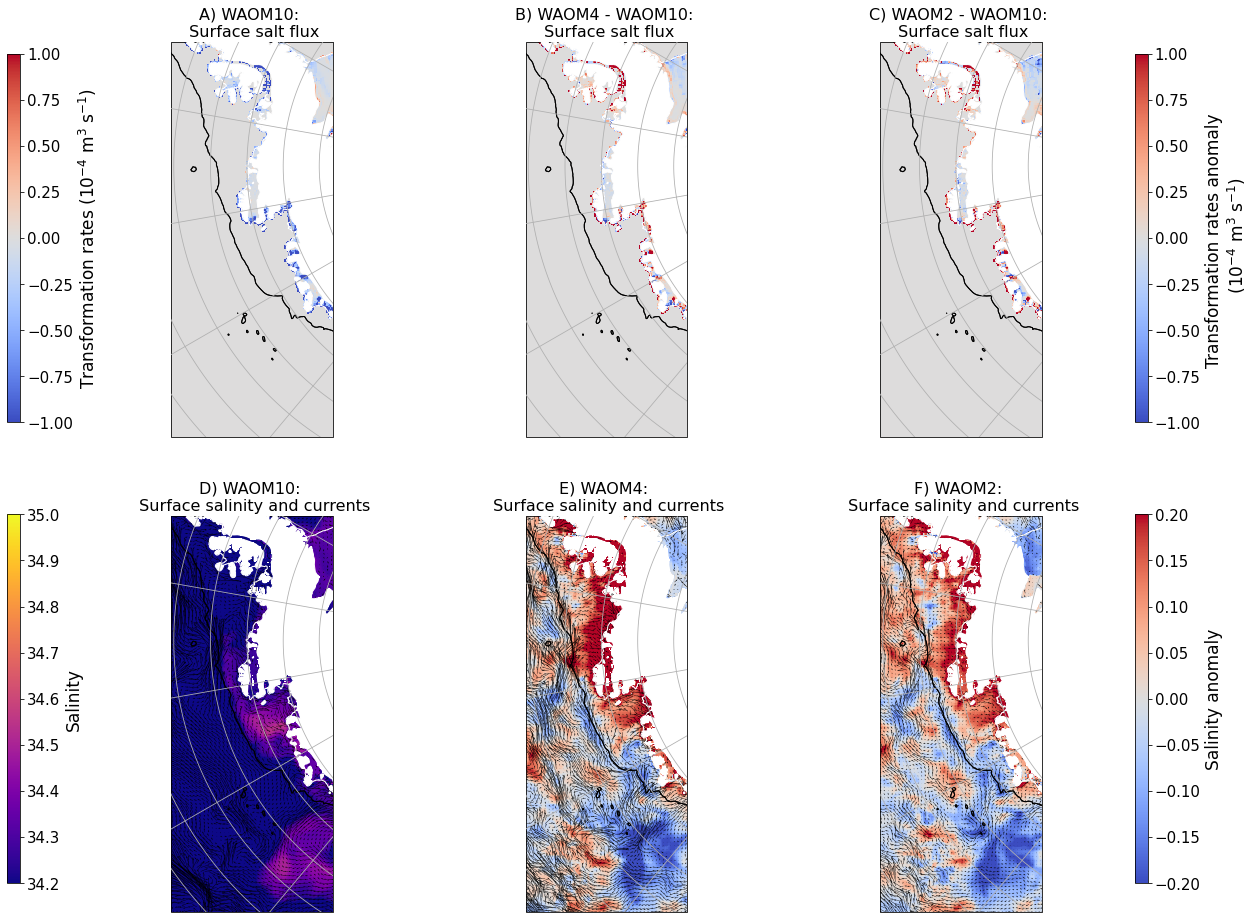

In [23]:
### Figures for the paper:

# 3) West Antarctica: only show WAOM10 x WAOM4 x WAOM2: upper row
# Surface salinity and annual currents: lower row

## plots WAnt


# integrated from 27.2:27.8 kg m-3: peak of buoyancy gain

# indexes [imin:imax]
imin=7
imax=17

salt_net_WAnt_10 = np.nansum(np.squeeze(salt_net_10[imin:imax]), axis=0)
salt_net_WAnt_4 = np.nansum(np.squeeze(salt_net_4[imin:imax]), axis=0)
salt_net_WAnt_2 = np.nansum(np.squeeze(salt_net_2[imin:imax]), axis=0)
salt_net_WAnt_4nt = np.nansum(np.squeeze(salt_net_4nt[imin:imax]), axis=0)
salt_net_WAnt_4c = np.nansum(np.squeeze(salt_net_4c[imin:imax]), axis=0)

salt_adv_WAnt_10 = np.nansum(np.squeeze(salt_adv_10[imin:imax]), axis=0)
salt_adv_WAnt_4 = np.nansum(np.squeeze(salt_adv_4[imin:imax]), axis=0)
salt_adv_WAnt_2 = np.nansum(np.squeeze(salt_adv_2[imin:imax]), axis=0)
salt_adv_WAnt_4nt = np.nansum(np.squeeze(salt_adv_4nt[imin:imax]), axis=0)
salt_adv_WAnt_4c = np.nansum(np.squeeze(salt_adv_4c[imin:imax]), axis=0)

salt_diff_WAnt_10 = np.nansum(np.squeeze(salt_diff_10[imin:imax]), axis=0)
salt_diff_WAnt_4 = np.nansum(np.squeeze(salt_diff_4[imin:imax]), axis=0)
salt_diff_WAnt_2 = np.nansum(np.squeeze(salt_diff_2[imin:imax]), axis=0)
salt_diff_WAnt_4nt = np.nansum(np.squeeze(salt_diff_4nt[imin:imax]), axis=0)
salt_diff_WAnt_4c = np.nansum(np.squeeze(salt_diff_4c[imin:imax]), axis=0)

salt_sfc_WAnt_10 = np.nansum(np.squeeze(salt_sfc_10[imin:imax]), axis=0)
salt_sfc_WAnt_4 = np.nansum(np.squeeze(salt_sfc_4[imin:imax]), axis=0)
salt_sfc_WAnt_2 = np.nansum(np.squeeze(salt_sfc_2[imin:imax]), axis=0)
salt_sfc_WAnt_4nt = np.nansum(np.squeeze(salt_sfc_4nt[imin:imax]), axis=0)
salt_sfc_WAnt_4c = np.nansum(np.squeeze(salt_sfc_4c[imin:imax]), axis=0)

salt_hdiff_WAnt_10 = np.nansum(np.squeeze(salt_hdiff_10[imin:imax]), axis=0)
salt_hdiff_WAnt_4 = np.nansum(np.squeeze(salt_hdiff_4[imin:imax]), axis=0)
salt_hdiff_WAnt_2 = np.nansum(np.squeeze(salt_hdiff_2[imin:imax]), axis=0)
salt_hdiff_WAnt_4nt = np.nansum(np.squeeze(salt_hdiff_4nt[imin:imax]), axis=0)
salt_hdiff_WAnt_4c = np.nansum(np.squeeze(salt_hdiff_4c[imin:imax]), axis=0)

salt_sfc_WAnt_10 = np.nansum(np.squeeze(salt_sfc_10[imin:imax]), axis=0)
salt_sfc_WAnt_4 = np.nansum(np.squeeze(salt_sfc_4[imin:imax]), axis=0)
salt_sfc_WAnt_2 = np.nansum(np.squeeze(salt_sfc_2[imin:imax]), axis=0)
salt_sfc_WAnt_4nt = np.nansum(np.squeeze(salt_sfc_4nt[imin:imax]), axis=0)
salt_sfc_WAnt_4c = np.nansum(np.squeeze(salt_sfc_4c[imin:imax]), axis=0)

# interpolate transformation maps to 10km grid to show difference:

#salt_vdiff_Wed_4
salt_sfc_WAnt_4_interp = pyresample.kd_tree.resample_custom(w4_def,salt_sfc_WAnt_4,w10_def,\
                                         radius_of_influence=300000,neighbours=10,weight_funcs=wf)
salt_sfc_WAnt_2_interp = pyresample.kd_tree.resample_custom(w2_def,salt_sfc_WAnt_2,w10_def,\
                                         radius_of_influence=5000,neighbours=1,weight_funcs=wf)

# limits for contour of ice front (West Antarct. IS):
xlimit = np.arange(500,2800,1)
ylimit = np.arange(250,1250,1)

## Final plots:
# [LHS]    NET - (ADV + HDIFF)   =   VDIFF + SFC_FLX   [RHS]

# scale for WMT rates:
scl = 1e4

fig = plt.figure(figsize=(18,16))

ax1 = fig.add_subplot(2,3,1, projection=proj)
plt.title('A) WAOM10: \n Surface salt flux', fontsize=16)
cy=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_sfc_WAnt_10*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1, vmax=1)
ax1.gridlines(zorder=4)
ax1.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)
plt.ylabel('WAOM10',fontsize=16)

ax2 = fig.add_subplot(2,3,2, projection=proj)
plt.title('B) WAOM4 - WAOM10: \n Surface salt flux', fontsize=16)
cyd=plt.pcolormesh(lon_rho_10,lat_rho_10,(salt_sfc_WAnt_4_interp-salt_sfc_WAnt_10)*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1, vmax=1)
# cy=plt.pcolormesh(lon_rho_4,lat_rho_4,salt_sfc_WAnt_4*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1, vmax=1)
ax2.gridlines(zorder=4)
ax2.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

ax3 = fig.add_subplot(2,3,3, projection=proj)
plt.title('C) WAOM2 - WAOM10: \n Surface salt flux', fontsize=16)
cyd=plt.pcolormesh(lon_rho_10,lat_rho_10,(salt_sfc_WAnt_2_interp-salt_sfc_WAnt_10)*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1, vmax=1)
# cy=plt.pcolormesh(lon_rho_2,lat_rho_2,salt_sfc_WAnt_2*scl, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=-1, vmax=1)
ax3.gridlines(zorder=4)
ax3.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax3.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

# set colorbar
cbar_ax0 = fig.add_axes([0.05, 0.55, 0.01, 0.32])
fig.colorbar(cy, cax=cbar_ax0, orientation='vertical')
cbar_ax0.set_ylabel('Transformation rates (10$^{-4}$ m$^{3}$ s$^{-1}$)', fontsize=17)#, labelpad=-35)
cbar_ax0.tick_params(labelsize=15)

# set colorbar diff
cbar_ax1 = fig.add_axes([0.92, 0.55, 0.01, 0.32])
fig.colorbar(cyd, cax=cbar_ax1, orientation='vertical')
cbar_ax1.set_ylabel('Transformation rates anomaly \n (10$^{-4}$ m$^{3}$ s$^{-1}$)', fontsize=17)#, labelpad=-35)
cbar_ax1.tick_params(labelsize=15)


# salinity and currents (annual)
tmin=34.2
tmax=35
# spacing for current vectors:
vs10=3
vs4=7
vs2=14

ax4 = fig.add_subplot(2,3,4, projection=proj)
ct1=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_ann_sfc_10, transform=ccrs.PlateCarree(), cmap=plt.cm.plasma, vmin=tmin, vmax=tmax)
cv=ax4.quiver(xs_10[::vs10,::vs10],ys_10[::vs10,::vs10],u_10_sfc[::vs10,::vs10],v_10_sfc[::vs10,::vs10], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('D) WAOM10: \n Surface salinity and currents', fontsize=16)
ax4.gridlines(zorder=4)
ax4.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax4.add_feature(cfeature.LAND, zorder=3, facecolor='white')
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

# for anomalies:
atmin=-.2
atmax=.2

ax5 = fig.add_subplot(2,3,5, projection=proj)
ct2=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_ann_sfc_4-salt_ann_sfc_10, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
cv=ax5.quiver(xs_4[::vs4,::vs4],ys_4[::vs4,::vs4],u_4_sfc[::vs4,::vs4],v_4_sfc[::vs4,::vs4], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('E) WAOM4: \n Surface salinity and currents', fontsize=16)
ax5.gridlines(zorder=4)
ax5.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax5.add_feature(cfeature.LAND, zorder=3, facecolor='white')
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

ax6 = fig.add_subplot(2,3,6, projection=proj)
ct2=plt.pcolormesh(lon_rho_10,lat_rho_10,salt_ann_sfc_2-salt_ann_sfc_10, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
cv=ax6.quiver(xs_2[::vs2,::vs2],ys_2[::vs2,::vs2],u_2_sfc[::vs2,::vs2],v_2_sfc[::vs2,::vs2], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('F) WAOM2: \n Surface salinity and currents', fontsize=16)
ax6.gridlines(zorder=4)
ax6.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax6.add_feature(cfeature.LAND, zorder=3, facecolor='white')
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

# set colorbar
cbar_ax2 = fig.add_axes([0.05, 0.15, 0.01, 0.32])
fig.colorbar(ct1, cax=cbar_ax2, orientation='vertical')
cbar_ax2.set_ylabel('Salinity', fontsize=17)#, labelpad=-35)
cbar_ax2.tick_params(labelsize=15)

cbar_ax3 = fig.add_axes([0.92, 0.15, 0.01, 0.32])
fig.colorbar(ct2, cax=cbar_ax3, orientation='vertical')
cbar_ax3.set_ylabel('Salinity anomaly', fontsize=17)#, labelpad=-35)
cbar_ax3.tick_params(labelsize=15)

name_fig="waom10x4x2_WMTmaps_Full_sfc_salt_saltVel_iceshelf_WAnt_27.2-27.8kgm-3.png"
plt.savefig(fig_path + name_fig, dpi=300)
plt.show()


/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)
/CSC_CONTAINER/miniconda/envs/env1/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are no

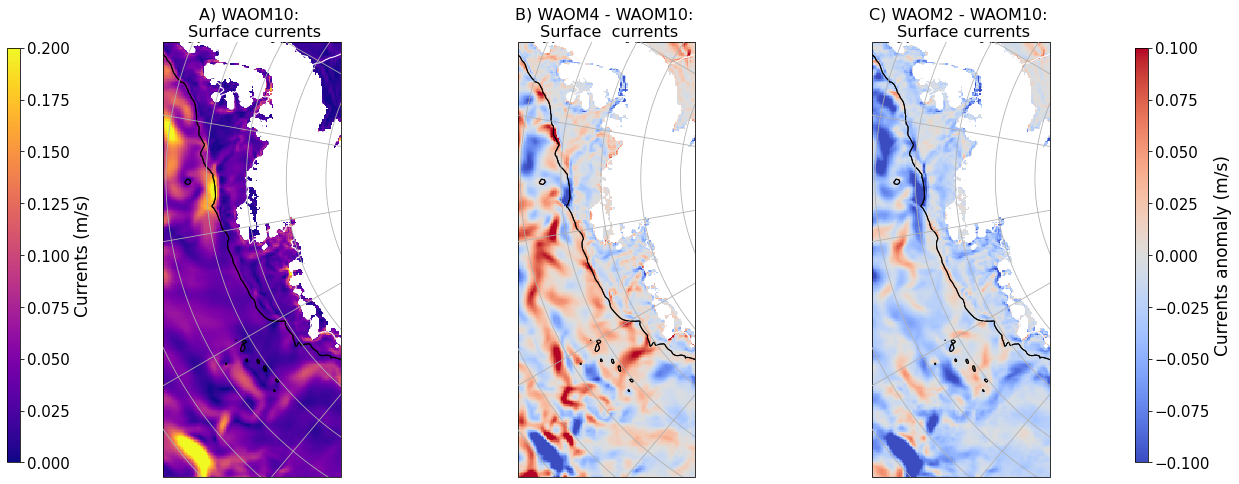

In [24]:
xlimit = np.arange(500,2800,1)
ylimit = np.arange(250,1250,1)

# scale for WMT rates:
scl = 1e4


fig = plt.figure(figsize=(18,8))

# currents (annual)
tmin=0
tmax=.2

# spacing for current vectors:
vs10=5
vs4=12


ax4 = fig.add_subplot(1,3,1, projection=proj)
ct1=plt.pcolormesh(lon_rho_10,lat_rho_10,V10_sfc, transform=ccrs.PlateCarree(), cmap=plt.cm.plasma, vmin=tmin, vmax=tmax)
# cv=ax4.quiver(xs_10[::vs10,::vs10],ys_10[::vs10,::vs10],u_10_sfc[::vs10,::vs10],v_10_sfc[::vs10,::vs10], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('A) WAOM10: \n Surface currents', fontsize=16)
ax4.gridlines(zorder=4)
ax4.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax4.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

# for anomalies
atmin=-.1
atmax=.1

ax5 = fig.add_subplot(1,3,2, projection=proj)
ct2=plt.pcolormesh(lon_rho_10,lat_rho_10,V4_sfc_interp-V10_sfc, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
# cv=ax5.quiver(xs_4[::vs4,::vs4],ys_4[::vs4,::vs4],u_4_sfc[::vs4,::vs4],v_4_sfc[::vs4,::vs4], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('B) WAOM4 - WAOM10: \n Surface  currents', fontsize=16)
ax5.gridlines(zorder=4)
ax5.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax5.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

ax6 = fig.add_subplot(1,3,3, projection=proj)
ct2=plt.pcolormesh(lon_rho_10,lat_rho_10,V2_sfc_interp-V10_sfc, transform=ccrs.PlateCarree(), cmap=plt.cm.coolwarm, vmin=atmin, vmax=atmax)
# cv=ax6.quiver(xs_4[::vs4,::vs4],ys_4[::vs4,::vs4],u_4c_sfc[::vs4,::vs4],v_4c_sfc[::vs4,::vs4], color='k', transform=ccrs.SouthPolarStereo(), scale=1.)
plt.title('C) WAOM2 - WAOM10: \n Surface currents', fontsize=16)
ax6.gridlines(zorder=4)
ax6.set_extent([-145, -68, -70, -67], crs=ccrs.PlateCarree())
ax6.add_feature(cfeature.LAND, zorder=3, facecolor='white') # edgecolor='white',
# plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(200,500,800), transform=ccrs.PlateCarree(), colors='grey')#, linestyles='dashed')
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],ice_draft[xlimit,ylimit],levels=[-.1], transform=ccrs.PlateCarree(), cmap=plt.cm.binary, linewidths=1)
plt.contour(lon_rho_2[xlimit,ylimit], lat_rho_2[xlimit,ylimit],h[xlimit,ylimit],levels=(2000,2001), transform=ccrs.PlateCarree(), colors='k', linewidths=1)

## set colorbar
cbar_ax2 = fig.add_axes([0.05, 0.15, 0.01, 0.72])
fig.colorbar(ct1, cax=cbar_ax2, orientation='vertical')
cbar_ax2.set_ylabel('Currents (m/s)', fontsize=17)#, labelpad=-35)
cbar_ax2.tick_params(labelsize=15)

cbar_ax3 = fig.add_axes([0.92, 0.15, 0.01, 0.72])
fig.colorbar(ct2, cax=cbar_ax3, orientation='vertical')
cbar_ax3.set_ylabel('Currents anomaly (m/s)', fontsize=17)#, labelpad=-35)
cbar_ax3.tick_params(labelsize=15)

name_fig="waom10x4x4c_WMTmaps_Full_salt_sfc_Vel_iceshelf_WAnt_27.2-27.8kgm-3.png"
plt.savefig(fig_path + name_fig, dpi=300)
plt.show()